**DO NOT RUN ALL, CHANGES IN THE DATASET WILL HAPPEN**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head(20)

,Unnamed: 0,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown
0,0,0001_01,False,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,...,Maham Ofracculy,False,False,True,False,False,False,False,True,False
1,1,0002_01,False,F/0/S,24.0,0.0,109.0,9.0,25.0,549.0,...,Juanna Vines,True,True,False,False,False,False,False,True,False
2,2,0003_01,False,A/0/S,58.0,1.0,43.0,3576.0,0.0,6715.0,...,Altark Susent,False,False,True,False,False,False,False,True,False
3,3,0003_02,False,A/0/S,33.0,0.0,0.0,1283.0,371.0,3329.0,...,Solam Susent,False,False,True,False,False,False,False,True,False
4,4,0004_01,False,F/1/S,16.0,0.0,303.0,70.0,151.0,565.0,...,Willy Santantines,True,True,False,False,False,False,False,True,False
5,5,0005_01,False,F/0/P,44.0,0.0,0.0,483.0,0.0,291.0,...,Sandie Hinetthews,True,True,False,False,False,False,True,False,False
6,6,0006_01,False,F/2/S,26.0,0.0,42.0,1539.0,3.0,0.0,...,Billex Jacostaffey,True,True,False,False,False,False,False,True,False
7,7,0006_02,True,G/0/S,28.0,0.0,0.0,0.0,0.0,0.0,...,Candra Jacostaffey,True,True,False,False,False,False,False,True,False
8,8,0007_01,False,F/3/S,35.0,0.0,0.0,785.0,17.0,216.0,...,Andona Beston,True,True,False,False,False,False,False,True,False
9,9,0008_01,True,B/1/P,14.0,0.0,0.0,0.0,0.0,0.0,...,Erraiam Flatic,True,False,True,False,False,True,False,False,False


In [4]:
train_data['ShoppingMall'].size

8693

In [5]:
data = train_data['ShoppingMall'].sort_values()

In [6]:
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(0)

In [7]:
train_data.head(20)

,Unnamed: 0,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown
0,0,0001_01,False,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,...,Maham Ofracculy,False,False,True,False,False,False,False,True,False
1,1,0002_01,False,F/0/S,24.0,0.0,109.0,9.0,25.0,549.0,...,Juanna Vines,True,True,False,False,False,False,False,True,False
2,2,0003_01,False,A/0/S,58.0,1.0,43.0,3576.0,0.0,6715.0,...,Altark Susent,False,False,True,False,False,False,False,True,False
3,3,0003_02,False,A/0/S,33.0,0.0,0.0,1283.0,371.0,3329.0,...,Solam Susent,False,False,True,False,False,False,False,True,False
4,4,0004_01,False,F/1/S,16.0,0.0,303.0,70.0,151.0,565.0,...,Willy Santantines,True,True,False,False,False,False,False,True,False
5,5,0005_01,False,F/0/P,44.0,0.0,0.0,483.0,0.0,291.0,...,Sandie Hinetthews,True,True,False,False,False,False,True,False,False
6,6,0006_01,False,F/2/S,26.0,0.0,42.0,1539.0,3.0,0.0,...,Billex Jacostaffey,True,True,False,False,False,False,False,True,False
7,7,0006_02,True,G/0/S,28.0,0.0,0.0,0.0,0.0,0.0,...,Candra Jacostaffey,True,True,False,False,False,False,False,True,False
8,8,0007_01,False,F/3/S,35.0,0.0,0.0,785.0,17.0,216.0,...,Andona Beston,True,True,False,False,False,False,False,True,False
9,9,0008_01,True,B/1/P,14.0,0.0,0.0,0.0,0.0,0.0,...,Erraiam Flatic,True,False,True,False,False,True,False,False,False


In [8]:
data = train_data['Spa'].sort_values()
print(data)
data.to_csv("Spa.csv")

0           0.0
5177        0.0
5176        0.0
5173        0.0
5172        0.0
         ...   
6921    15586.0
1095    16139.0
1390    16594.0
7995    18572.0
5722    22408.0
Name: Spa, Length: 8693, dtype: float64


In [9]:
train_data['Spa'] = train_data['Spa'].fillna(0)

In [10]:
train_data.isnull().any()

Unnamed: 0                   False
PassengerId                  False
CryoSleep                    False
Cabin                         True
Age                           True
VIP                           True
RoomService                  False
FoodCourt                    False
ShoppingMall                 False
Spa                          False
VRDeck                       False
Name                          True
Transported                  False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
HomePlanet_unknown           False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
Destination_unknown          False
dtype: bool

In [11]:
data = train_data['VRDeck'].sort_values()
print(data)
data.to_csv("VRDeck.csv")

0           0.0
4051        0.0
7109        0.0
4049        0.0
4048        0.0
         ...   
3366    16337.0
6547    17074.0
725     17306.0
4311    20336.0
5619    24133.0
Name: VRDeck, Length: 8693, dtype: float64


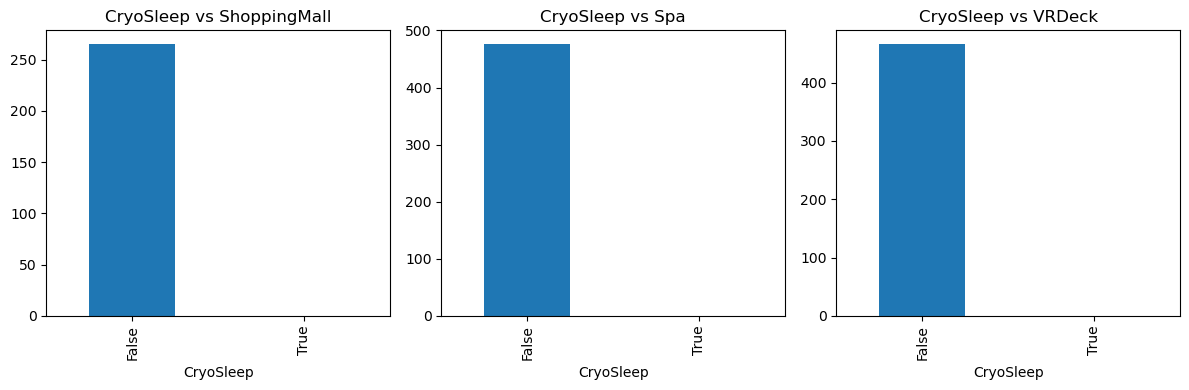

In [12]:
cryo_shop = train_data.groupby('CryoSleep')['ShoppingMall'].mean()
cryo_spa = train_data.groupby('CryoSleep')['Spa'].mean()
cryo_vr = train_data.groupby('CryoSleep')['VRDeck'].mean()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

cryo_shop.plot(kind='bar', ax=axes[0], title="CryoSleep vs ShoppingMall")
cryo_spa.plot(kind='bar', ax=axes[1], title="CryoSleep vs Spa")
cryo_vr.plot(kind='bar', ax=axes[2], title="CryoSleep vs VRDeck")

plt.tight_layout()
plt.show()


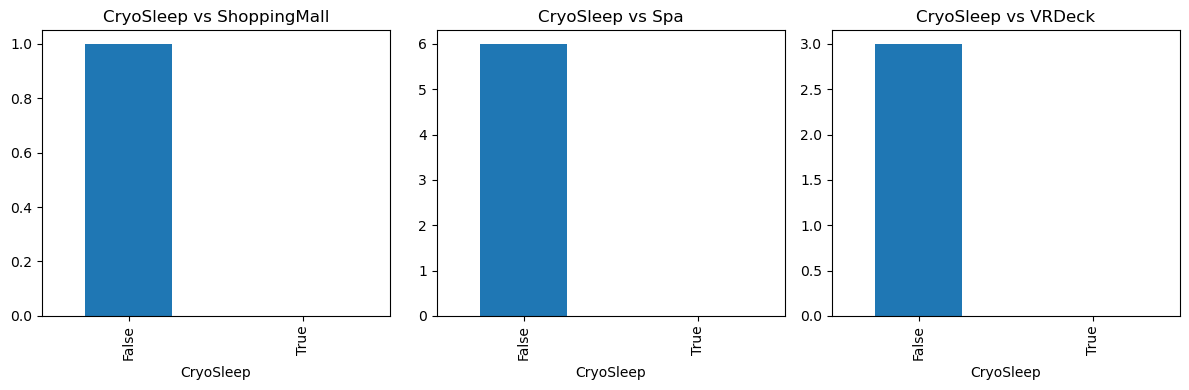

In [13]:
cryo_shop = train_data.groupby('CryoSleep')['ShoppingMall'].median()
cryo_spa = train_data.groupby('CryoSleep')['Spa'].median()
cryo_vr = train_data.groupby('CryoSleep')['VRDeck'].median()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

cryo_shop.plot(kind='bar', ax=axes[0], title="CryoSleep vs ShoppingMall")
cryo_spa.plot(kind='bar', ax=axes[1], title="CryoSleep vs Spa")
cryo_vr.plot(kind='bar', ax=axes[2], title="CryoSleep vs VRDeck")

plt.tight_layout()
plt.show()

In [14]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    train_data.loc[train_data['CryoSleep'] == True, col] = 0
    train_data[col] = train_data[col].fillna(train_data[col].median())

In [15]:
train_data.isnull().any()

Unnamed: 0                   False
PassengerId                  False
CryoSleep                    False
Cabin                         True
Age                           True
VIP                           True
RoomService                  False
FoodCourt                    False
ShoppingMall                 False
Spa                          False
VRDeck                       False
Name                          True
Transported                  False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
HomePlanet_unknown           False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
Destination_unknown          False
dtype: bool

In [16]:
spending_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

# If all spending columns are 0 and CryoSleep is missing → set to True
train_data.loc[
    train_data['CryoSleep'].isna() & (train_data[spending_cols].sum(axis=1) == 0),
    'CryoSleep'
] = True

# For remaining missing CryoSleep → fill with False (since they likely are awake)
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)

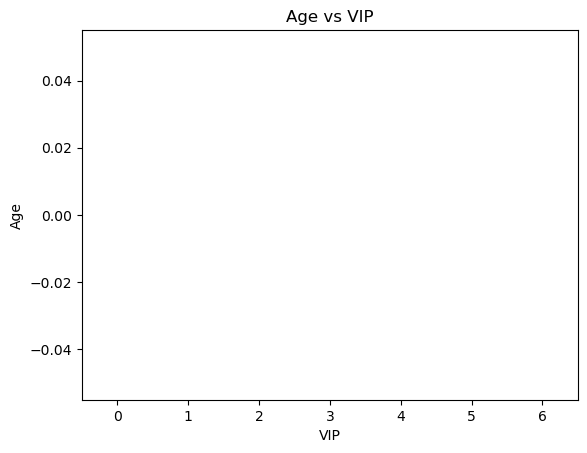

In [17]:
train_data['VIP'] = train_data['VIP'].map({True:1, False:0})


sns.stripplot(x='VIP', y='Age', data=train_data, jitter=True, alpha=0.5)
plt.title("Age vs VIP")
plt.show()

In [18]:
check = train_data.groupby(['CryoSleep', 'VIP']).size()
print(check)

Series([], dtype: int64)


In [19]:
pd.crosstab(train_data['CryoSleep'], train_data['VIP'])

VIP
CryoSleep


In [ ]:
missing_rows = pd.concat([
    train_data[train_data['HomePlanet'].isnull()],
    train_data[train_data['Destination'].isnull()]
]).drop_duplicates()
missing_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,0.0,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,0.0,0.0,0.0,0.0,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,0.0,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,0.0,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True
8551,9130_01,Mars,True,F/1765/S,NaN,41.0,0.0,0.0,0.0,0.0,0.0,0.0,Blers Corte,True
8616,9195_02,Mars,True,F/1779/S,NaN,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True
8621,9197_02,Europa,False,C/308/P,NaN,41.0,1.0,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False


In [ ]:
train_data.isnull().any()

PassengerId                  False
CryoSleep                    False
Cabin                         True
Age                           True
VIP                           True
RoomService                  False
FoodCourt                    False
ShoppingMall                 False
Spa                          False
VRDeck                       False
Name                          True
Transported                  False
False                        False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
HomePlanet_unknown           False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
Destination_unknown          False
dtype: bool

In [ ]:
pd.crosstab(train_data["Destination"], train_data["HomePlanet"])

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,690,886,193
PSO J318.5-22,712,19,49
TRAPPIST-1e,3101,1189,1475


try 0 0 0 method first for HomePlanet and Destination
and then try also a seperate column for unknown

In [ ]:
train_data.loc[train_data['HomePlanet'].isna(), 'HomePlanet'] = "unknown"
train_data["HomePlanet"].head(61)

0      Europa
1       Earth
2      Europa
3      Europa
4       Earth
       ...   
56      Earth
57      Earth
58       Mars
59    unknown
60      Earth
Name: HomePlanet, Length: 61, dtype: object

In [ ]:
train_data = pd.get_dummies(train_data, columns = ["HomePlanet"])

In [ ]:
train_data.loc[train_data['Destination'].isna(), 'Destination'] = "unknown"

In [ ]:
train_data = pd.get_dummies(train_data, columns = ["Destination"])

In [ ]:
train_data[train_data['Age'].isna()]

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Transported,False,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown
50,0052_01,False,G/6/S,NaN,0.0,4.0,0.0,2.0,4683.0,0.0,...,False,unknown,True,False,False,False,False,False,True,False
64,0068_01,False,E/4/S,NaN,0.0,793.0,0.0,2.0,253.0,0.0,...,False,unknown,False,False,True,False,False,False,True,False
137,0149_01,True,G/27/S,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,True,unknown,True,False,False,False,True,False,False,False
181,0202_02,False,A/2/P,NaN,0.0,0.0,2433.0,0.0,878.0,443.0,...,True,unknown,False,True,False,False,True,False,False,False
184,0206_01,False,C/9/S,NaN,0.0,2.0,1720.0,12.0,1125.0,122.0,...,True,unknown,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,True,G/1425/S,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,False,unknown,True,False,False,False,False,False,True,False
8301,8862_03,True,C/329/S,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,True,unknown,False,True,False,False,False,False,True,False
8374,8956_04,False,G/1453/P,NaN,0.0,194.0,1.0,10.0,629.0,0.0,...,False,unknown,True,False,False,False,False,False,True,False
8407,8988_01,True,G/1448/S,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,True,unknown,True,False,False,False,False,False,True,False


In [ ]:
train_data[train_data['VIP'].isna()]

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Transported,False,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown
145,0165_01,True,F/37/P,35.0,NaN,0.0,0.0,0.0,0.0,0.0,...,True,unknown,False,False,True,False,False,False,True,False
566,0593_01,False,D/24/P,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,...,False,unknown,False,False,True,False,False,False,True,False
582,0607_01,False,C/22/P,37.0,NaN,27.0,654.0,10.0,881.0,9568.0,...,False,unknown,False,True,False,False,False,False,True,False
596,0619_01,True,C/24/S,39.0,NaN,0.0,0.0,0.0,0.0,0.0,...,True,unknown,False,True,False,False,False,False,True,False
678,0709_02,True,A/7/S,25.0,NaN,0.0,0.0,0.0,0.0,0.0,...,True,unknown,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,8945_02,False,D/270/S,21.0,NaN,3036.0,32.0,0.0,2.0,416.0,...,False,unknown,False,True,False,False,False,False,True,False
8367,8948_01,False,B/342/S,57.0,NaN,0.0,13.0,0.0,52.0,11325.0,...,False,unknown,False,True,False,False,False,False,True,False
8430,9006_01,True,B/343/S,33.0,NaN,0.0,0.0,0.0,0.0,0.0,...,True,unknown,False,True,False,False,False,False,True,False
8630,9205_03,True,B/300/P,52.0,NaN,0.0,0.0,0.0,0.0,0.0,...,True,unknown,False,True,False,False,False,False,True,False


In [ ]:
train_data.loc[train_data['VIP'].isna() & (train_data["Age"] < 17), 'VIP'] = False

C:\Users\gayat\AppData\Local\Temp\ipykernel_15488\3292602030.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_data.loc[train_data['VIP'].isna() & (train_data["Age"] < 17), 'VIP'] = False


In [ ]:
pd.crosstab(train_data["HomePlanet_Earth"], train_data["VIP"])

VIP,0.0,1.0
HomePlanet_Earth,,
False,3815,199
True,4520,0


In [ ]:
pd.crosstab(train_data["HomePlanet_Mars"], train_data["VIP"])

VIP,0.0,1.0
HomePlanet_Mars,,
False,6673,136
True,1662,63


In [ ]:
train_data.loc[train_data['VIP'].isna() & train_data["HomePlanet_Earth"], 'VIP'] = False

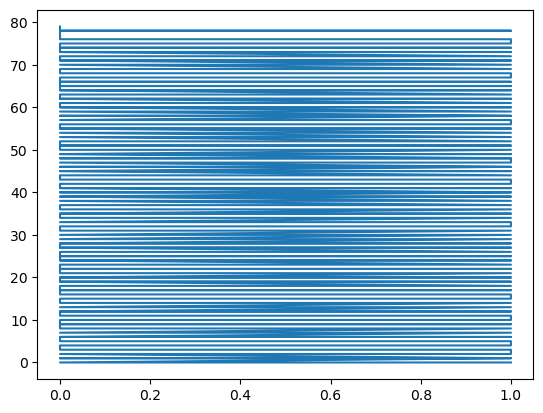

In [ ]:
data = train_data.sort_values("Age")
plt.plot(data["CryoSleep"], data["Age"])

In [ ]:
train_data = train_data.drop(columns = ["False"])

B is not allocated to earthlings

In [ ]:
# Split the 'Cabin' column into three new columns
# .str.split('/') splits the string by the '/' delimiter
# expand=True creates new columns for each split part
cabin_parts = train_data['Cabin'].str.split('/', expand=True)

# Assign meaningful names to the new columns
train_data['Cabin_Deck'] = cabin_parts[0]  # First part: 'B', 'F', 'A', etc.
train_data['Cabin_Num'] = cabin_parts[1]   # Second part: '0', '1', '2', etc.
train_data['Cabin_Side'] = cabin_parts[2]  # Third part: 'P', 'S', 'T', etc.

# You can then drop the original 'Cabin' column if it's no longer needed
train_data = train_data.drop(columns=[0, 'Cabin'])

print(train_data.head())

KeyError: 'Cabin'

In [2]:
train_data = pd.read_csv("train.csv")


In [23]:
train_data.head()

,Unnamed: 0,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown,Cabin_Deck,Cabin_Num,Cabin_Side
0,0,0001_01,False,39.0,NaN,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,True,False,B,0,P
1,1,0002_01,False,24.0,NaN,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,True,False,F,0,S
2,2,0003_01,False,58.0,NaN,43.0,3576.0,0.0,6715.0,49.0,...,True,False,False,False,False,True,False,A,0,S
3,3,0003_02,False,33.0,NaN,0.0,1283.0,371.0,3329.0,193.0,...,True,False,False,False,False,True,False,A,0,S
4,4,0004_01,False,16.0,NaN,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,True,False,F,1,S


In [37]:
train_data.drop(columns=["index"], axis = 0)
train_data.to_csv("train.csv", index=False)

In [ ]:
train_data.sort_values()